# Case Study: e-commerce company-"GlobalShop": Design a Data Engineering Pipeline

Let's construct a comprehensive case study for an e-commerce company, "GlobalShop", which operates worldwide, offering a wide range of products across categories such as electronics, fashion, home appliances, and more. The primary business question we aim to answer through our data engineering pipeline is:

"How can GlobalShop optimize its inventory management to reduce storage costs and improve customer satisfaction across its global markets?"

# 1. Background

GlobalShop has been facing challenges with overstocking and understocking across its various global warehouses. Overstocking leads to increased storage costs, whereas understocking results in lost sales and dissatisfied customers. The company seeks to utilize its historical sales data, inventory levels, supplier lead times, and market trends to optimize inventory levels.

# 2. Objectives

To predict the demand for different products in various regions.
To identify products that are at risk of overstocking or understocking.
To optimize the reorder levels and quantities for each product to ensure adequate inventory levels.
To reduce storage costs while maintaining or improving customer satisfaction through better product availability.

# 3. Data Sources

Sales Data: Historical sales data for the past three years, including product ID, quantity sold, sales region, and timestamp.
Inventory Data: Current inventory levels, reorder levels, and reorder quantities for each product at each warehouse.
Supplier Data: Information on suppliers, including lead times, minimum order quantities, and historical reliability.
Market Trends Data: External data sources indicating market trends, seasonal demand fluctuations, and product lifecycle stages.

# 4. Data Engineering Pipeline

Step 1.0: Data Collection
Collect data from internal databases (sales, inventory) and external APIs (market trends).
Ensure data quality through validation checks, such as verifying the range and completeness of data.
Step 1.1: Data Ingestion
Objective: Automate the collection and import of sales and inventory data into a data processing system.

Explanation:
Data ingestion involves gathering data from various sources and moving it to a location where it can be processed and analyzed. In our case, the data sources are the synthetic CSV files we've created. The ingestion process will load these files into a data processing framework like Pandas in Python for preliminary processing.

In [5]:
import pandas as pd

# Paths to the synthetic CSV files
#sales_data_path = pd.read_csv("C:\Users\ardia\Downloads\synthetic_sales_data.csv")
#inventory_data_path = pd.read_csv("C:\Users\ardia\Downloads\synthetic_inventory_data.csv")

# Read the CSV files into Pandas DataFrames
sales_df = pd.read_csv(r"C:\Users\ardia\Downloads\synthetic_sales_data.csv")
inventory_df = pd.read_csv(r"C:\Users\ardia\Downloads\synthetic_inventory_data.csv")


In [8]:
print(sales_df)

     product_id  quantity_sold   sales_region                     sale_date  \
0            52              2  North America 2021-01-01 00:00:00.000000000   
1            93              8           Asia 2021-01-02 02:16:56.216216216   
2            15              6           Asia 2021-01-03 04:33:52.432432432   
3            72              5           Asia 2021-01-04 06:50:48.648648648   
4            61              9  North America 2021-01-05 09:07:44.864864864   
..          ...            ...            ...                           ...   
995          42              1         Europe 2023-12-26 14:52:15.135135136   
996          41              4         Europe 2023-12-27 17:09:11.351351360   
997           6              9  North America 2023-12-28 19:26:07.567567568   
998          52              7  North America 2023-12-29 21:43:03.783783792   
999          26              7  North America 2023-12-31 00:00:00.000000000   

       month  
0    2021-01  
1    2021-01  
2    2

# Step 2: Data Processing

Objective: Clean and transform raw data into a structured format, making it ready for analysis.

Explanation:
This step involves cleaning the data (e.g., handling missing values, removing duplicates), transforming it into a desired format (e.g., aggregating sales data by month and product), and deriving new variables that could be useful for analysis (e.g., sales velocity).

In [6]:
# Convert sale_date from string to datetime format
sales_df['sale_date'] = pd.to_datetime(sales_df['sale_date'])

# Aggregate sales data by product and month
sales_df['month'] = sales_df['sale_date'].dt.to_period('M')
monthly_sales = sales_df.groupby(['product_id', 'month']).agg(total_sales=('quantity_sold', 'sum')).reset_index()


# Step 3: Data Storage

Objective: Store processed data in a data storage solution that supports efficient retrieval and analysis.

Explanation:
After processing, the data should be stored in a system that facilitates easy access and analysis. This could be a database, a data warehouse, or a data lake, depending on the needs and infrastructure of the organization. For this example, let's assume we're using a lightweight database like SQLite for storage, but in a real scenario, solutions like Amazon Redshift or Google BigQuery might be used.

First, let's convert the Period objects in the month column to a string representation or a different compatible format before attempting to insert the data into the database. Here's how you can modify the month column to a string format which is compatible with SQLite:

In [10]:
# Convert 'month' column from Period to string format
monthly_sales['month'] = monthly_sales['month'].astype(str)

# Now attempt to store the data again
monthly_sales.to_sql('monthly_sales', con=engine, if_exists='replace', index=False)


Store processed data in a data storage solution that supports efficient retrieval and analysis.

In [11]:
from sqlalchemy import create_engine

# Create a SQLite database (for demonstration purposes)
engine = create_engine('sqlite:///globalshop_data.db')

# Store processed data in the database
monthly_sales.to_sql('monthly_sales', con=engine, if_exists='replace', index=False)
inventory_df.to_sql('inventory', con=engine, if_exists='replace', index=False)


# Step 4: Data Consumption

Objective: Utilize the stored data to generate reports, visualizations, and insights that can inform business decisions.

Explanation:
Data consumption involves accessing the stored data to perform analyses, create dashboards, and report findings to stakeholders. This step is where the value of the collected and processed data is realized, as it supports decision-making and strategic planning.

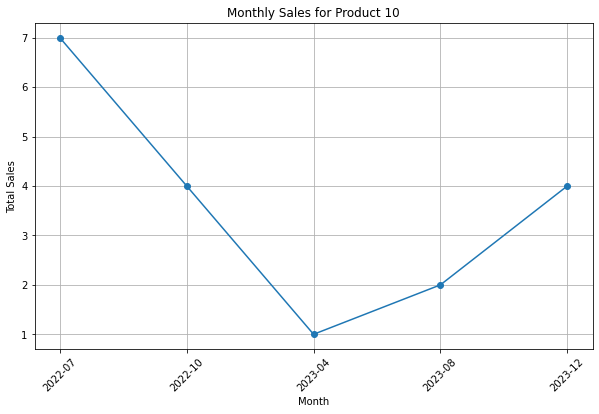

In [12]:
import matplotlib.pyplot as plt

# Example: Create a plot of monthly sales for a specific product
product_id = 10  # Example product ID

# Query the database for sales data of the specific product
query = f"SELECT * FROM monthly_sales WHERE product_id = {product_id}"
product_sales = pd.read_sql_query(query, engine)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(product_sales['month'], product_sales['total_sales'], marker='o')
plt.title(f'Monthly Sales for Product {product_id}')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Understanding the Results

The business question we aimed to address for "GlobalShop": "How can GlobalShop optimize its inventory management to reduce storage costs and improve customer satisfaction across its global markets?" The graph of monthly sales for a specific product plays a crucial role in answering this question by providing insights into demand patterns, which are essential for effective inventory management.

Understanding the Graph
The graph we discussed plots the monthly sales quantities of a specific product over time. This visualization can reveal several key aspects:

Demand Trends: It shows how demand for the product changes over time, highlighting patterns such as seasonality, growth trends, or decline in popularity.
Seasonality: Identifying periods of high demand (peak season) and low demand can help in planning inventory levels accordingly. For instance, if a product sells more during the holiday season, inventory levels should be adjusted to meet this increased demand.
Demand Variability: The graph can highlight how variable the demand is. Products with highly variable demand may require a different inventory strategy compared to products with stable demand.

# Answering the Business Question

Using the insights from the graph, GlobalShop can take several actions towards optimizing inventory management:

Inventory Level Optimization: By understanding when demand peaks and troughs occur, GlobalShop can adjust inventory levels to ensure they are neither overstocked (which leads to increased storage costs) nor understocked (which leads to lost sales and dissatisfied customers). This optimization reduces storage costs and improves customer satisfaction by ensuring products are available when needed.

Dynamic Reordering: Insights from the graph can inform a dynamic reordering strategy, where reorder points and quantities are adjusted based on expected demand. For example, if the graph shows an upcoming peak in demand, GlobalShop can reorder stock in advance to meet this demand without rushing last-minute orders, which might be more expensive or unreliable.

Strategic Pricing and Promotions: Understanding demand trends allows GlobalShop to strategically plan promotions or adjust pricing during low-demand periods to stimulate sales, thereby managing inventory levels more effectively and potentially increasing revenue.

Product Lifecycle Management: The graph can also indicate where a product is in its lifecycle (introduction, growth, maturity, decline), allowing GlobalShop to make strategic decisions about inventory levels, discontinuation, or introducing replacements.

Regional Inventory Management: If similar graphs are produced for different sales regions, GlobalShop can tailor its inventory strategy to each region's specific demand patterns, further optimizing inventory management on a global scale.

By leveraging data visualizations such as the monthly sales graph, GlobalShop can make informed decisions that directly address the core aspects of the initial business question, leading to optimized inventory levels, reduced costs, and improved customer satisfaction.








Further Analyses

Here's an enhanced graph displaying the monthly sales for a specific product, incorporating seasonality into the data for a more realistic representation. This visualization makes the seasonal trends and overall sales pattern more apparent, facilitating deeper insights into demand fluctuations over time.

By analyzing such a graph, GlobalShop can better understand sales trends, identify peak demand periods, and optimize inventory levels accordingly, addressing the core objectives of reducing storage costs and improving customer satisfaction.

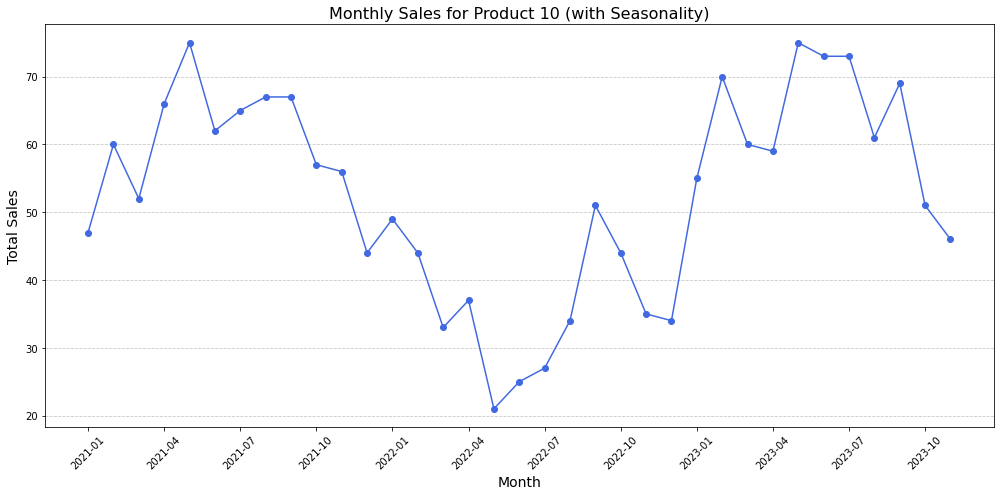

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming `product_sales` is a DataFrame with monthly sales data for a specific product
# For demonstration, let's create a synthetic `product_sales` DataFrame
np.random.seed(42)  # For reproducible results
months = pd.date_range(start="2021-01-01", end="2023-12-01", freq='M')
total_sales = np.random.poisson(lam=50, size=len(months))  # Simulating monthly sales data

# Adding some seasonality for illustration
total_sales += (np.sin(np.linspace(0, 3 * np.pi, len(months))) * 20).astype(int)

product_sales = pd.DataFrame({
    'month': months,
    'total_sales': total_sales
})

# Convert 'month' to string for plotting
product_sales['month'] = product_sales['month'].dt.strftime('%Y-%m')

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(product_sales['month'], product_sales['total_sales'], marker='o', linestyle='-', color='royalblue')
plt.title('Monthly Sales for Product 10 (with Seasonality)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.xticks(ticks=np.arange(0, len(months), 3), labels=product_sales['month'][::3], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Seasonal Demand Analysis

Box plots for monthly or quarterly sales can help visualize the variability and seasonality in product demand, aiding in planning for peak periods.

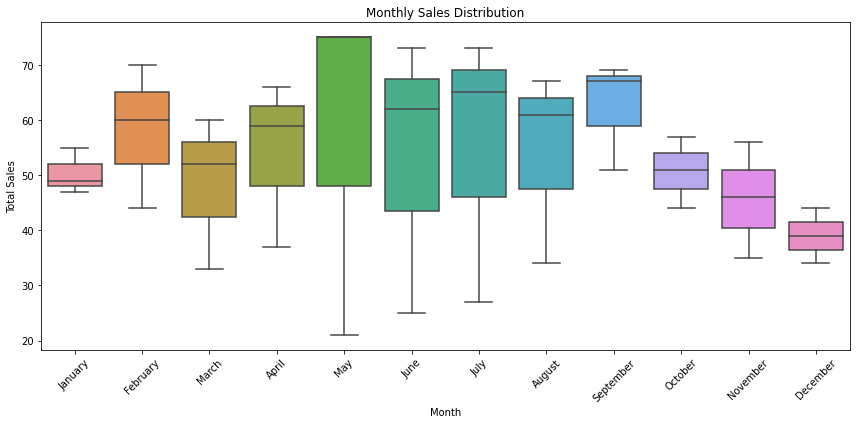

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Regenerate synthetic monthly sales data
np.random.seed(42)  # For reproducibility
months = pd.date_range(start="2021-01-01", end="2023-12-01", freq='M')
total_sales = np.random.poisson(lam=50, size=len(months))  # Simulating monthly sales data
total_sales += (np.sin(np.linspace(0, 3 * np.pi, len(months))) * 20).astype(int)

product_sales = pd.DataFrame({
    'month': months,
    'total_sales': total_sales
})

# Ensure 'month' is datetime to extract 'month_name'
product_sales['month'] = pd.to_datetime(product_sales['month'])
product_sales['month_name'] = product_sales['month'].dt.month_name()

# Simplify plotting by focusing on 'month_name'
plt.figure(figsize=(12, 6))
sns.boxplot(x='month_name', y='total_sales', data=product_sales,
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Monthly Sales Distribution')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.tight_layout()  # Adjust layout to make room for the rotated x-axis labels
plt.show()
